In [1]:
import wotan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wotan import flatten
from wotan import t14
import lightkurve as lk
import os 
from transitleastsquares import transitleastsquares, cleaned_array, transit_mask

from matplotlib.pyplot import yscale
from lightkurve.lightcurvefile import TessLightCurveFile
from lightkurve.lightcurve import TessLightCurve
from astropy.timeseries import LombScargle

plt.rcParams['figure.dpi'] = 200

In [40]:
transit_times = [1330.1, 1338.75, 1347.5]

In [37]:
def simple_plot(light_curve, title_str):
    
    t = light_curve.time.value
    f = light_curve.flux.value
    
    fig, axs = plt.subplots(1,2,figsize=(9,2))

    ax = axs[0]
    #left_xlim = (1320,1360)

    left = np.where(t<1700)
    ax.scatter(t[left], f[left], s=1, c='black')

    for i in transit_times: 
        ax.axvline(i, c='grey', lw=0.5)

    #ax.axvline(x=1350)
    #ax.axvline(x=1347,label='1347-1350')

    #ax.legend()
    #ax.set(xlim=left_xlim)

    ax = axs[1]
    right = np.where(t>1700)
    ax.scatter(t[right], f[right], s=1, c='black')

    plt.suptitle(title_str)

    for i in range(2): 
        ax = axs[i]
        ax.set(xlabel="Time (BJD)", ylabel="Flux")

    plt.show()

In [41]:
full_raw = lk.search_lightcurve('TIC 441420236').download_all()
test_raw = full_raw[2,8]
raw_lc = test_raw.stitch()

lc = lk.LightCurve(raw_lc)

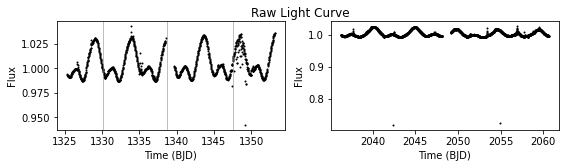

In [42]:
simple_plot(raw_lc, 'Raw Light Curve')

['Straylight2']
371
[]
3794
['Straylight', 'Straylight2']
12
['Straylight']
441


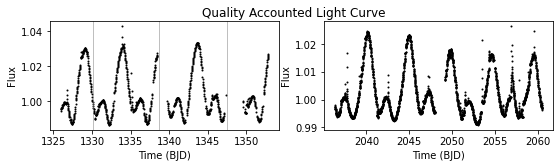

In [43]:
quality_mask = np.where(raw_lc.quality==0)

for i in list(set(raw_lc.quality)): 
    print(lk.TessQualityFlags.decode(i))
    print(len(np.where(raw_lc.quality==i)[0]))

raw_lc = raw_lc[quality_mask]
simple_plot(raw_lc, 'Quality Accounted Light Curve')